# Softmax Classifer 1D

Table of Contents
In this lab, you will use Softmax to classify three linearly separable classes, the features are in one dimension

* Make Some Data
* Build Softmax Classifier
* Train the Model
* Analyze Results


# Preparation

In [7]:
# import the libraries we need for this lab

import torch.nn as nn
import torch
import matplotlib.pyplot as plot
import numpy as np
from torch.utils.data import Dataset, DataLoader

Use the helper function to plot labeled data points:

In [20]:
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label= 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), Y[Y == 1].numpy(), 'ro', label= 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), Y[Y == 2].numpy(), 'go', label= 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat = 0', 'yhat =1', 'yhat =2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b , y_1, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_1)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate =  True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue' )
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)), interpolate =True, color = 'red' )
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),  interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
            
    plt.legend()
    plt.show()
            



Set the random seed

In [21]:
# Set the random seed

torch.manual_seed(0)

# Make some data

Create some linearly separable data with three classes:

In [22]:
class Data(Dataset):
    
    # constructor
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1,1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] =1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len =  self.x.shape[0]
        
        
    # GEtter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

Create the dataset object

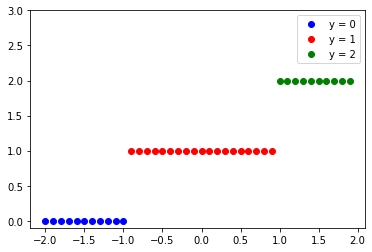

In [23]:
data_set = Data()
data_set.x
plot_data(data_set)

# Build a Softmax Classifier

Build a Softmax classifier by using the Sequential module

In [24]:
# Build a Softmax classifier technically you only need nn.linear

model  = nn.Sequential(nn.Linear(1,3))
model.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.0075],
                      [ 0.5364],
                      [-0.8230]])),
             ('0.bias', tensor([-0.7359, -0.3852,  0.2682]))])

# Train the Model
Create the criterion function the optizer and the dataloader

In [25]:
# Create criterion function , optimizer and dataloader

criterion = nn.CrossEntropyLoss()
optimizer =  torch.optim.SGD(model.parameters(), lr =0.01)
trainloader = DataLoader(dataset = data_set, batch_size = 5)

Train the model for every 5o epoch

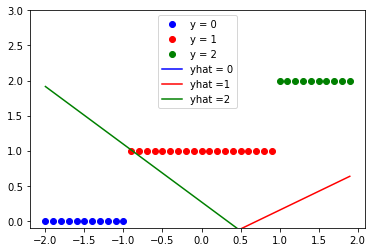

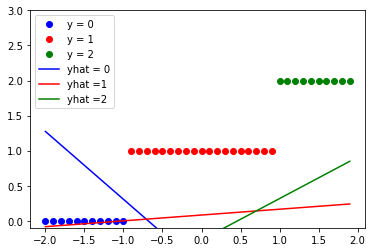

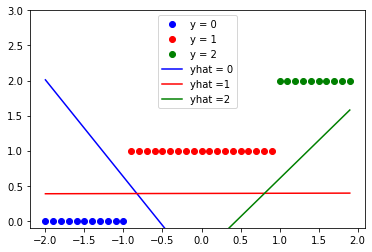

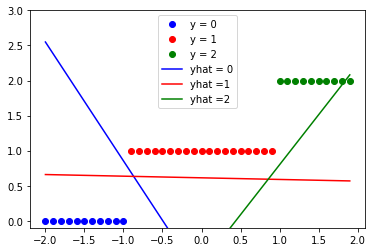

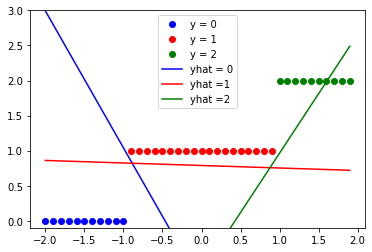

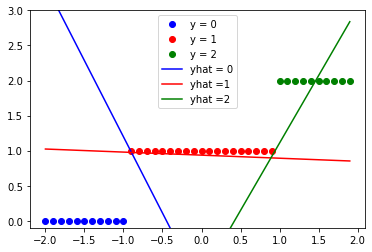

In [26]:
LOSS = []
def train_model(epochs):
    
    for epoch in range(epochs):
        
        if epoch % 50 ==0:
            pass
        
            plot_data(data_set, model)
        for x , y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()
train_model(300)
        
    

# Analyze Results

Find the predicted class on the test data

In [30]:
# Make the prediction

z = model(data_set.x)
_, yhat =  z.max(1)
print('The Prediction: ', yhat)

The Prediction:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


# accuaracy


In [34]:
# print the accuracy

correct = (data_set.y == yhat).sum().item()
accuracy = correct / len(data_set)
print('The accuracy:', accuracy)

The accuracy: 0.975


You can also use the softmax function to convert the output to a probability,first, we create a Softmax object:

In [36]:
Softmax_fn = nn.Softmax(dim = -1)
Softmax_fn

Softmax(dim=-1)

The result is a tensor  `Probability` , where each row corresponds to a different sample, and each column corresponds to that sample belonging to a particular class

In [41]:
probability = Softmax_fn(z)
probability

tensor([[9.2675e-01, 7.3110e-02, 1.3548e-04],
        [9.0934e-01, 9.0447e-02, 2.0825e-04],
        [8.8828e-01, 1.1140e-01, 3.1868e-04],
        [8.6305e-01, 1.3646e-01, 4.8505e-04],
        [8.3317e-01, 1.6610e-01, 7.3354e-04],
        [7.9825e-01, 2.0065e-01, 1.1010e-03],
        [7.5810e-01, 2.4026e-01, 1.6380e-03],
        [7.1278e-01, 2.8481e-01, 2.4125e-03],
        [6.6264e-01, 3.3384e-01, 3.5135e-03],
        [6.0845e-01, 3.8649e-01, 5.0540e-03],
        [5.5130e-01, 4.4153e-01, 7.1736e-03],
        [4.9257e-01, 4.9739e-01, 1.0041e-02],
        [4.3382e-01, 5.5233e-01, 1.3853e-02],
        [3.7661e-01, 6.0455e-01, 1.8840e-02],
        [3.2234e-01, 6.5240e-01, 2.5260e-02],
        [2.7214e-01, 6.9445e-01, 3.3408e-02],
        [2.2677e-01, 7.2962e-01, 4.3611e-02],
        [1.8664e-01, 7.5713e-01, 5.6228e-02],
        [1.5182e-01, 7.7653e-01, 7.1652e-02],
        [1.2213e-01, 7.8758e-01, 9.0293e-02],
        [9.7191e-02, 7.9024e-01, 1.1257e-01],
        [7.6535e-02, 7.8460e-01, 1

we can obtain the probability of the first sample belonging to the first, second and third class respectively as follows:

In [40]:
for i in range(3):
    print('Probability of class {} is given by {}'.format(i, probability[0,1]))

Probability of class 0 is given by 0.07310982048511505
Probability of class 1 is given by 0.07310982048511505
Probability of class 2 is given by 0.07310982048511505
